## Simulation Analysis

This notebook will go over analyzing simulated data gathered from 2-Simulation-Generation.

In [2]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *

from utils.ratios import *
from utils.analysis import *
          
# Settings used to generate simulation data
from utils.simulation_settings import *

### Settings

In [3]:
THETA_BAND = [4, 8]
BETA_BAND = [15,30]

## Center Frequency

In [80]:
# Load data
cf_low = np.load("./dat/cf_data_low.npy")
cf_high = np.load("./dat/cf_data_high.npy")

In [81]:

cf_low_syns = []
cf_high_syns = []

for val in cf_low[2]:
    cf_low_syns.append(val.gaussian_params[0][0])
for val in cf_high[2]:
    cf_high_syns.append(val.gaussian_params[0][0])

In [87]:
cf_low_ratios = []
cf_high_ratios = []

for cf in cf_low[1]:
    cf_low_ratios.append(calc_band_ratio(cf_low[0], cf, THETA_BAND, BETA_BAND))
    
for cf in cf_high[1]:
    cf_high_ratios.append(calc_band_ratio(cf_high[0], cf, THETA_BAND, BETA_BAND))

In [91]:
df_cf_low_cols = np.array([cf_low_ratios, cf_low_syns]).T.tolist()
df_cf_high_cols = np.array([cf_high_ratios, cf_high_syns]).T.tolist()

df_cf_low = pd.DataFrame(df_cf_low_cols, columns=["Band_Ratio", "Low_Center_Frequency" ])
df_cf_high = pd.DataFrame(df_cf_high_cols,columns=["Band_Ratio", "High_Center_Frequency" ])

In [128]:
df_cf_high

,Band_Ratio,High_Center_Frequency
0,1.980342,15.0
1,1.891183,15.1
2,1.834551,15.2
3,1.783706,15.3
4,1.759922,15.4
5,1.735728,15.5
6,1.698570,15.6
7,1.682874,15.7
8,1.669209,15.8
9,1.660138,15.9


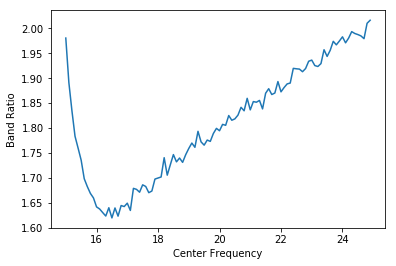

In [141]:
plt.ylabel('Band Ratio')
plt.xlabel('Center Frequency')

plt.plot(df_cf_low.Low_Center_Frequency, df_cf_low.Band_Ratio)
plt.plot(df_cf_high.High_Center_Frequency, df_cf_high.Band_Ratio)

## Amplitude

In [101]:
amp_low = np.load("./dat/amp_data_low.npy")
amp_high = np.load("./dat/amp_data_high.npy")

In [102]:
amp_low_syns = []
amp_high_syns = []

for val in amp_low[2]:
    amp_low_syns.append(val.gaussian_params[0][1])
for val in amp_high[2]:
    amp_high_syns.append(val.gaussian_params[0][1])

In [103]:
amp_low_ratios = []
amp_high_ratios = []

for amp in amp_low[1]:
    amp_low_ratios.append(calc_band_ratio(amp_low[0], amp, THETA_BAND, BETA_BAND))
    
for amp in amp_high[1]:
    amp_high_ratios.append(calc_band_ratio(amp_high[0], amp, THETA_BAND, BETA_BAND))

In [105]:
df_amp_low_cols = np.array([amp_low_ratios, amp_low_syns]).T.tolist()
df_amp_high_cols = np.array([amp_high_ratios, amp_high_syns]).T.tolist()

df_amp_low = pd.DataFrame(df_amp_low_cols, columns=["Band_Ratio", "Low_Amplitude"])
df_amp_high = pd.DataFrame(df_amp_high_cols,columns=["Band_Ratio", "High_Amplitude"])

In [119]:
df_amp_low

,Band_Ratio,Low_Amplitude
0,3.781695,0.0
1,4.295444,0.1
2,4.889345,0.2
3,5.596701,0.3
4,6.419253,0.4
5,7.399077,0.5
6,8.604430,0.6
7,10.096311,0.7
8,11.809811,0.8
9,13.947060,0.9


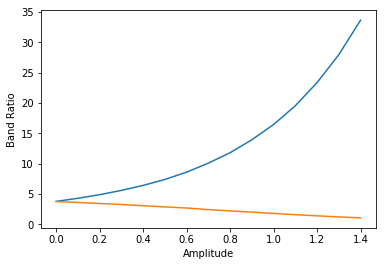

In [137]:
plt.ylabel('Band Ratio')
plt.xlabel('Amplitude')

plt.plot(df_amp_low.Low_Amplitude,df_amp_low.Band_Ratio)
plt.plot(df_amp_high.High_Amplitude,df_amp_high.Band_Ratio)

In [107]:
bw_low = np.load("./dat/bw_data_low.npy")
bw_high = np.load("./dat/bw_data_high.npy")

In [112]:
bw_low_syns = []
bw_high_syns = []

for val in bw_low[2]:
    bw_low_syns.append(val.gaussian_params[0][2])
for val in bw_high[2]:
    bw_high_syns.append(val.gaussian_params[0][2])

In [113]:

bw_low_ratios = []
bw_high_ratios = []

for bw in bw_low[1]:
    bw_low_ratios.append(calc_band_ratio(bw_low[0], bw, THETA_BAND, BETA_BAND))
    
for bw in bw_high[1]:
    bw_high_ratios.append(calc_band_ratio(bw_high[0], bw, THETA_BAND, BETA_BAND))

In [114]:
df_bw_low_cols = np.array([bw_low_ratios, bw_low_syns]).T.tolist()
df_bw_high_cols = np.array([bw_high_ratios, bw_high_syns]).T.tolist()

df_bw_low = pd.DataFrame(df_bw_low_cols, columns=["Band_Ratio", "Low_BandWidth"])
df_bw_high = pd.DataFrame(df_bw_high_cols,columns=["Band_Ratio", "High_BandWidth"])

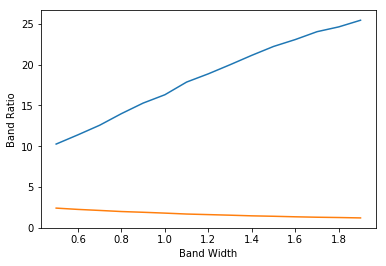

In [139]:
plt.ylabel('Band Ratio')
plt.xlabel('Band Width')

plt.plot(df_bw_low.Low_BandWidth, df_bw_low.Band_Ratio)
plt.plot(df_bw_high.High_BandWidth, df_bw_high.Band_Ratio)